In [ ]:
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy.stats import shapiro
import re

In [ ]:
emotion = pd.read_csv("tweet_emotions.csv")
print(emotion.head(10))
emotion.info()
print("Missing values per column:", emotion.isnull().sum())
print("Unique emotions in the dataset:", emotion['sentiment'].unique())
print("Number of tweets per emotion in the dataset:", emotion['sentiment'].value_counts())

     tweet_id   sentiment  \
0  1956967341       empty   
1  1956967666     sadness   
2  1956967696     sadness   
3  1956967789  enthusiasm   
4  1956968416     neutral   
5  1956968477       worry   
6  1956968487     sadness   
7  1956968636       worry   
8  1956969035     sadness   
9  1956969172     sadness   

                                                                                                                                content  
0                                          @tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[  
1                                                                          Layin n bed with a headache  ughhhh...waitin on your call...  
2                                                                                                   Funeral ceremony...gloomy friday...  
3                                                                                                  wants to hang out with friend

In [ ]:
pd.set_option('display.max_colwidth', None)
emotion.head(10)

tweet_id   sentiment  \
0  1956967341       empty   
1  1956967666     sadness   
2  1956967696     sadness   
3  1956967789  enthusiasm   
4  1956968416     neutral   
5  1956968477       worry   
6  1956968487     sadness   
7  1956968636       worry   
8  1956969035     sadness   
9  1956969172     sadness   

                                                                                                                                content  
0                                          @tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[  
1                                                                          Layin n bed with a headache  ughhhh...waitin on your call...  
2                                                                                                   Funeral ceremony...gloomy friday...  
3                                                                                                  wants to hang out with friends SOON!  
4                                                @dannycastillo We want to trade with someone who has Houston tickets, but no one will.  
5                                                  Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends  
6  I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!  
7                                                                                                  Hmmm. http://www.djhero.com/ is down  
8                                                                                               @charviray Charlene my love. I miss you  
9                                                                                            @kelcouch I'm sorry  at least it's Friday?

In [ ]:
slang_list = [
    "af", "bae", "btw", "brb", "bff", "dm", "fomo", "ftiw", "ftw", "goat", "gtg", "hbd", "hmu", "idc",
    "idk", "imo", "irl", "jk", "lmao", "lmk", "lol", "nbd", "nvm", "omg", "rofl", "smh", "tbh", "tfw",
    "tl;dr", "yolo", "rn", "fml", "wbu", "icymi", "omw", "tmi", "gr8", "asap", "lit", "yas", "fam", "szn",
    "sus", "slay", "vibe", "bet", "woke", "swag", "xd", "bbae", "stfu", "ftw", "l8r", "wyd", "imho",
    "onfleek", "slaps", "hbd", "zaddy", "savage", "noob", "fire", "clout", "mood", "chill", "thirsty", "litty",
    "salty", "thicc", "yeet", "shook", "cray", "lowkey", "highkey", "lucky", "blessed", "twerk", "sus", "bae",
    "savage", "yas", "big mood", "finesse", "sksksk", "yasss", "fyp", "periodt", "stan", "spilling the tea",
    "flex", "drip", "lit", "no cap", "canceled", "boo", "period", "slay", "chillax", "vibe", "vibing", "meme",
    "tbh", "bruh", "rachet", "lit", "swole", "hypebeast", "boomer", "simp", "fit", "bussin", "stan", "shook",
    "simping", "grind", "lurk", "bounce", "slim", "shady", "bounce", "slay", "hyped", "sksksksk", "cancelled",
    "mood", "chill", "yeet", "flexing", "yolo", "stan", "finessed", "lit", "vibe check", "stunna", "savage",
    "wya", "ysl", "bffl", "get lit", "tbh", "bestie", "hype", "lolz", "yass", "big facts", "facts", "shooketh",
    "lmfao", "pmsl", "roflmao", "smdh", "holla", "holla back", "blm", "on point", "stay woke", "catch me outside",
    "savage af", "stay mad", "slaps", "stuntin", "slayin", "gang", "squad", "lit asf", "savage mode", "mood af",
    "on the grind", "catch these hands", "periodt", "broke ass", "salty af", "dope", "lit af", "sippin", "tea",
    "vibing", "tbh", "suss", "sus vibes", "yassssss", "stunt", "valid", "lurk", "capping", "no flex", "get it",
    "goals", "big mood", "hot mess", "slangin", "hundo", "mood swing", "im dead", "deadass", "ripped", "turnt",
    "wildin", "dank", "bomb", "clout chasing", "keep it 100", "ok boomer", "lowkey lit", "highkey savage",
    "savage vibes", "fyp", "vibes", "its a vibe", "catch these hands", "big energy", "hyped up", "lit vibes",
    "real talk", "that’s fire", "hold my beer", "damn right", "that’s a bet", "poppin", "get at me", "facts only",
    "basic", "thats bussin", "no cap", "cut the check", "finesse game", "real one", "bossed up", "big drip",
    "finna", "savage af", "savage energy", "bruh moment", "catch me outside", "big flex", "no cap", "running it",
    "bet that", "vibing hard", "drip too hard", "drop it like it’s hot", "okayy", "smh", "vibe out", "better flex",
    "too lit", "stay solid", "grind never stops", "i’m weak", "cut up", "fresh", "tbh", "peep this", "stop the cap",
    "say less", "we out", "all cap", "stay trill", "wavy", "lit fam", "yeah boy", "cool beans", "clean", "shady",
    "rich flex", "hold up", "that’s fire", "burner", "lowkey savage", "get the bag", "no chill", "stay flexin",
    "broke boy", "hustle hard", "yolo swag", "stop capping", "go up", "chill fam", "big drip", "man down", "it’s a vibe",
    "wave", "back at it", "run it", "noob", "finessing", "yeet it", "stay mad", "nope", "vibin’", "yolo swag", "lit fam",
    "take the L", "stay grindin", "get money", "running it", "facts", "get the bread", "get that", "yeet", "cap", "flexed"
]

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = text.replace('&quot;', '"')
    tokens = text.split()
    return ' '.join(tokens)

In [ ]:
def count_slang_in_tweet(text):
    # Define a regex pattern to find slang with repeated characters (e.g., "af", "afffff")
    slang_count = 0
    for slang in slang_list:

        # Regex pattern to detect the slang term with repetitions (e.g., "afffff", "lolol", etc.)
        pattern = re.compile(rf'\b{slang}\w*\b')
        slang_count += len(pattern.findall(text))
    return slang_count

emotion['clean_content'] = emotion['content'].apply(preprocess_text)
emotion['slang_count'] = emotion['clean_content'].apply(count_slang_in_tweet)

In [ ]:
print(emotion[emotion['content'].str.contains("&quot;", na=False)][['content', 'clean_content']].head(10))

                                                                                                                                                     content  \
24                                              so tired and i think i'm definitely going to get an ear infection.  going to bed &quot;early&quot; for once.   
62                                                  I want to buy this great album but unfortunately i dont hav enuff funds  its &quot;long time noisy&quot;   
79      @shondarhimes Sure you will tweet about this when you're back, but news is abuzz about TR Knight's leaving &quot;confirmed&quot; today.  Muy triste.   
89   .. I'm suppposed to be sleep. But i got some much to do. &amp; i got that one part of the song stuck in my head &quot;your a jerk (iknow)&quot;  blaahh   
228                                                    @fairyfroggie But yeah...I'm sad about my &quot;Ravenclaw&quot; account. I love that account to bits.   
240                @Nymo would have been

In [ ]:
def count_words(text):
    return len(text.split(" "))

emotion['word_count'] = emotion['clean_content'].apply(count_words)

<ipython-input-13-72ffd05f51d3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=emotion, x='slang_count', palette='viridis')


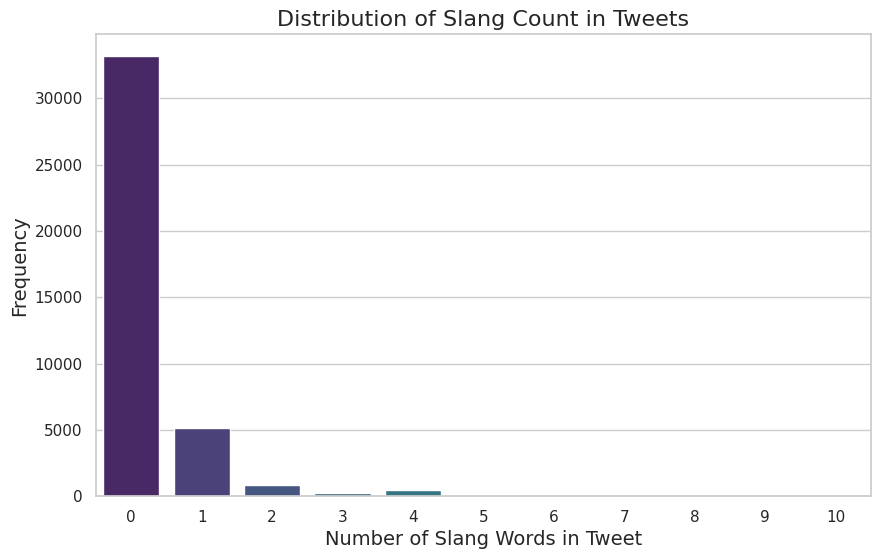

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=emotion, x='slang_count', palette='viridis')
plt.title('Distribution of Slang Count in Tweets', fontsize=16)
plt.xlabel('Number of Slang Words in Tweet', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

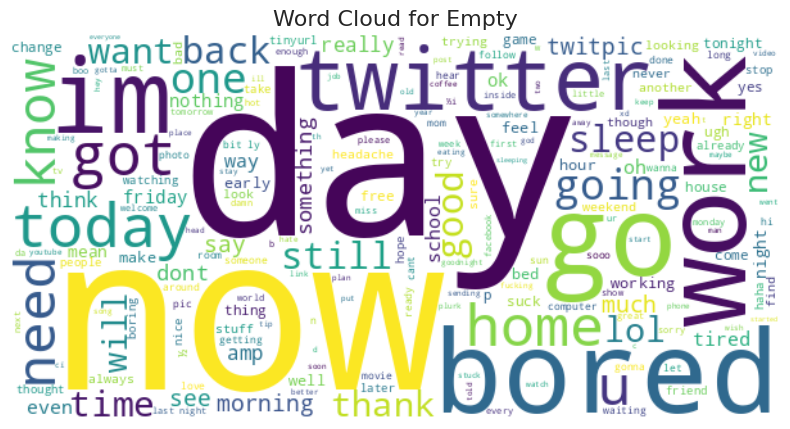

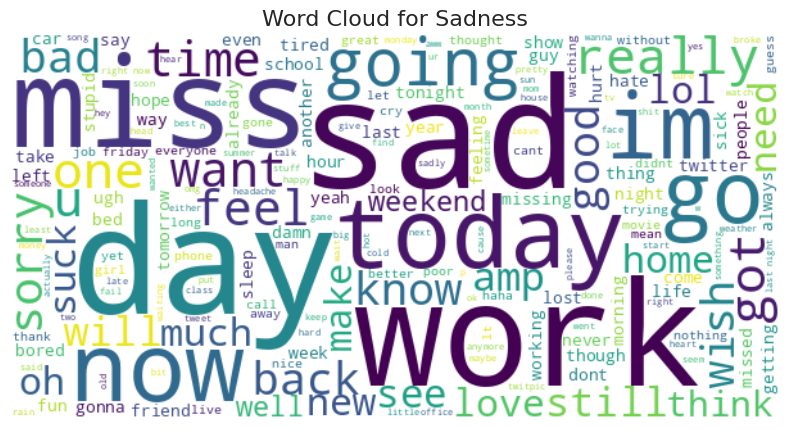

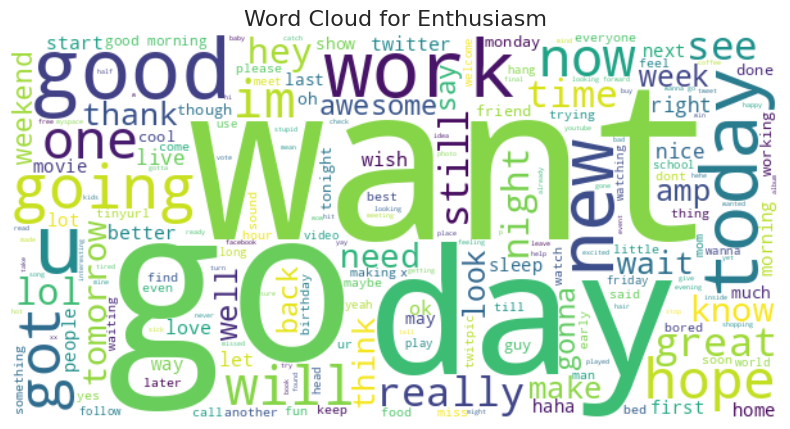

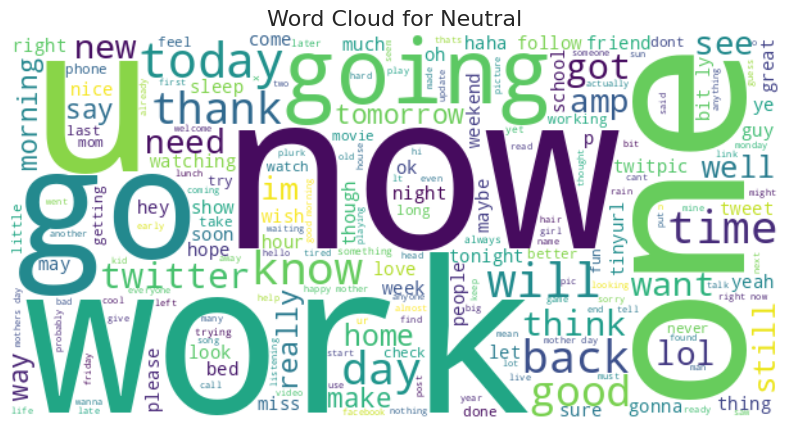

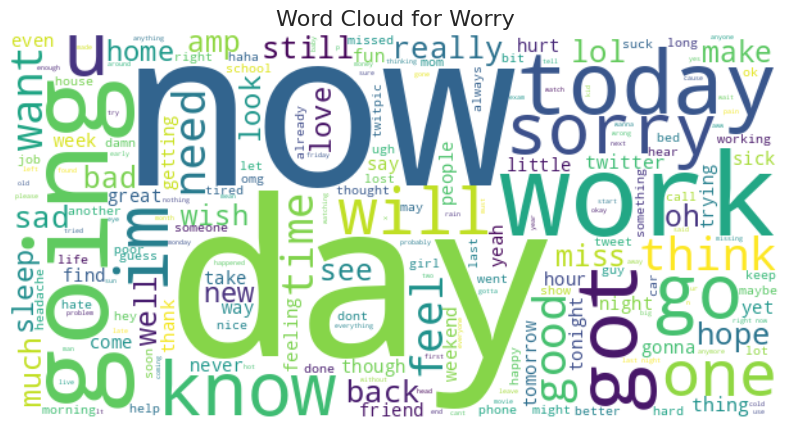

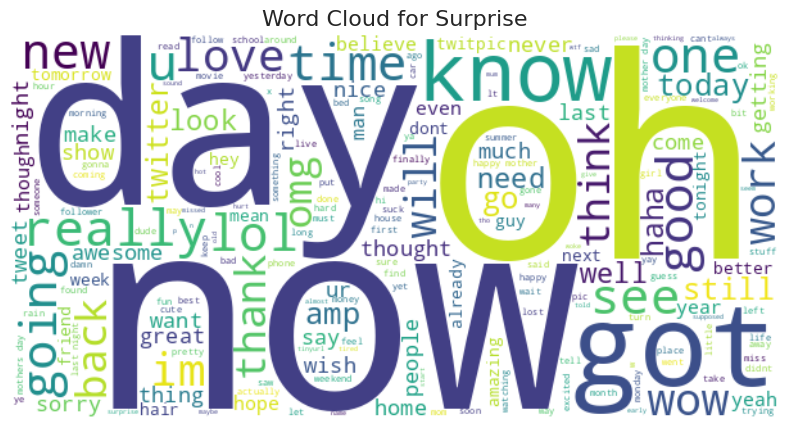

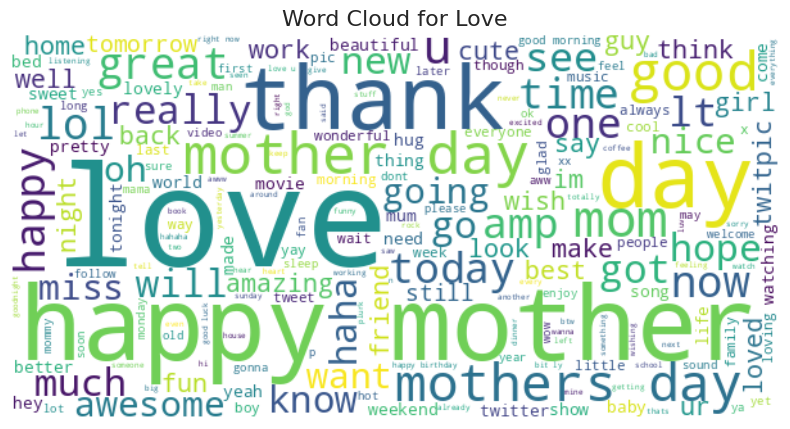

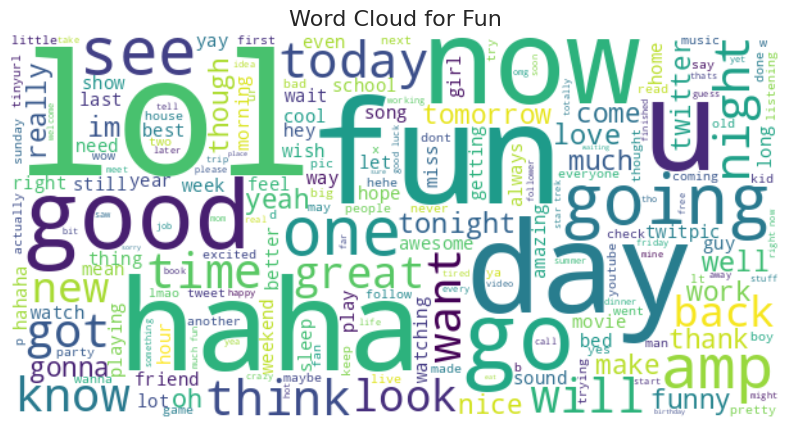

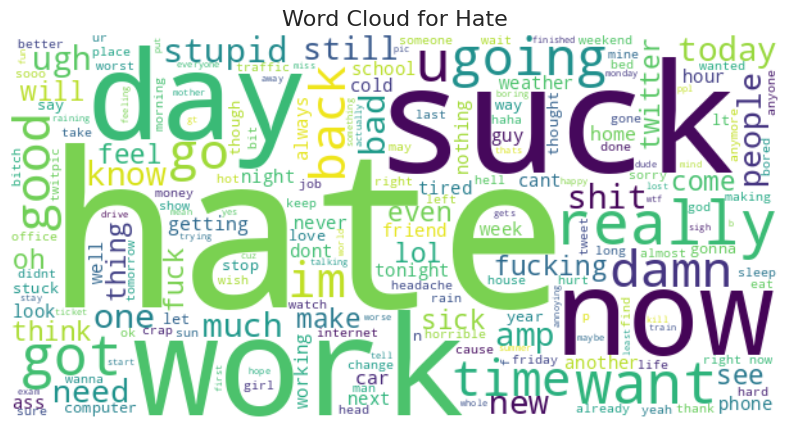

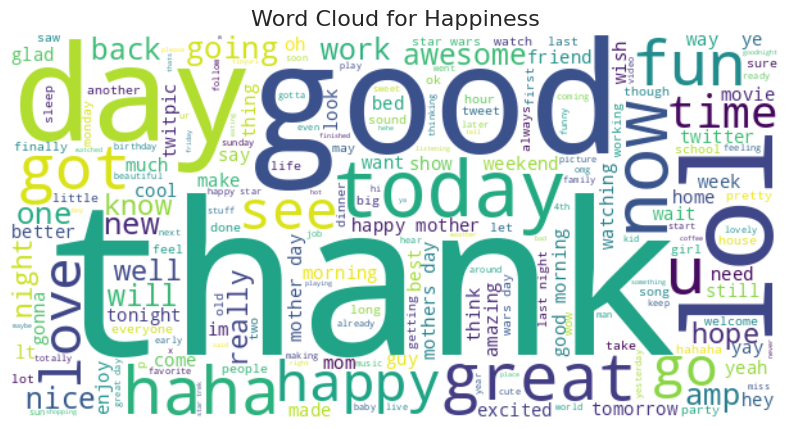

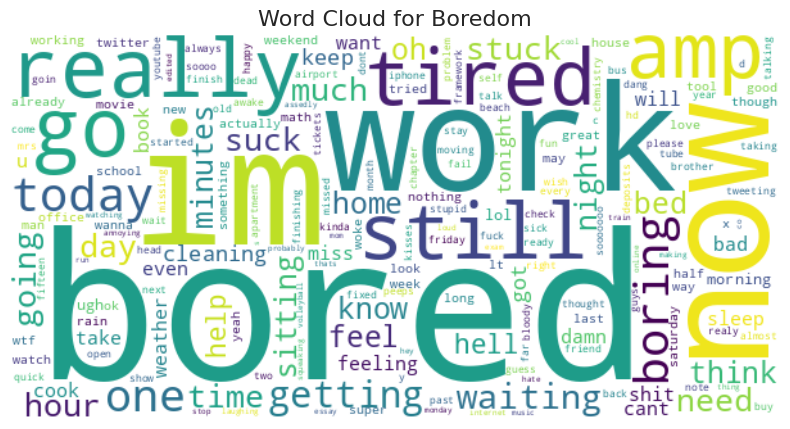

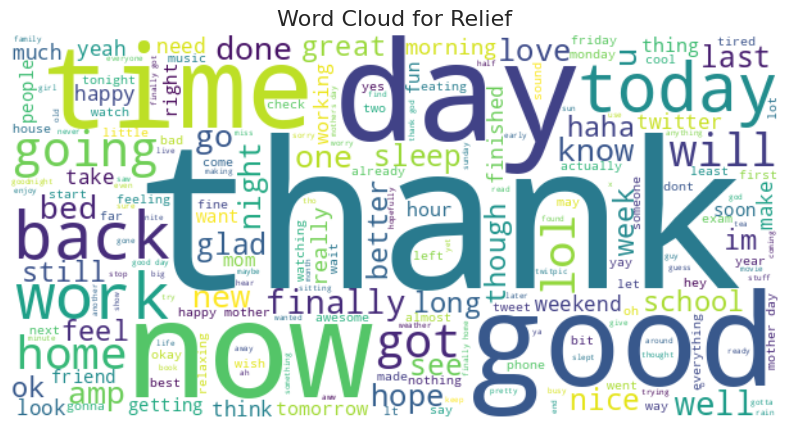

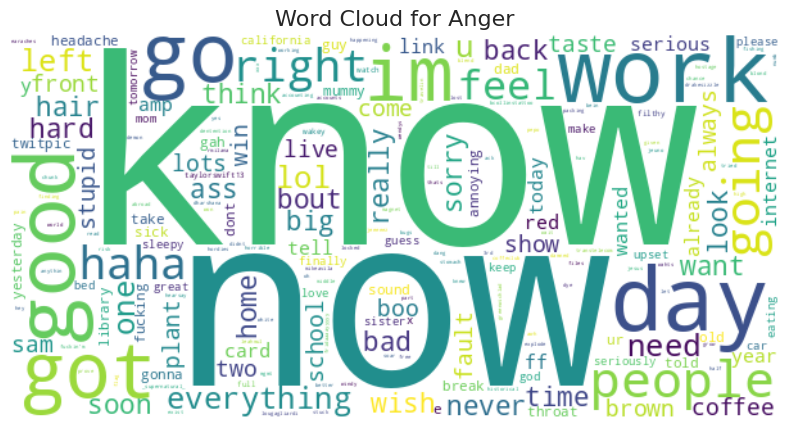

In [ ]:
# Word cloud by emotion
from wordcloud import WordCloud

def generate_wordcloud_for_emotion(emotion, emotion_label):
    emotion_tweets = emotion[emotion['sentiment'] == emotion_label]
    combined_text = " ".join(emotion_tweets['clean_content'])
    wordcloud = WordCloud(width=600, height=300, background_color="white").generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {emotion_label.capitalize()}", fontsize=16)
    plt.show()

unique_emotions = emotion['sentiment'].unique()
for emotion_label in unique_emotions:
    generate_wordcloud_for_emotion(emotion, emotion_label)

In [ ]:
def count_punctuation(text):
    exclamations = text.count('!')
    ellipses = text.count('...')
    question_marks = text.count('?')
    periods = text.count('.')
    commas = text.count(',')
    quotes = text.count('"')
    return exclamations, ellipses, question_marks, periods, commas, quotes

emotion[['exclamations', 'ellipses', 'question_marks', 'periods', 'commas', 'quotes']] = emotion['clean_content'].apply(lambda x: pd.Series(count_punctuation(x)))

<ipython-input-16-a2aa349a02b3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Punctuation', y='Count', data=punctuation_df, palette='viridis')


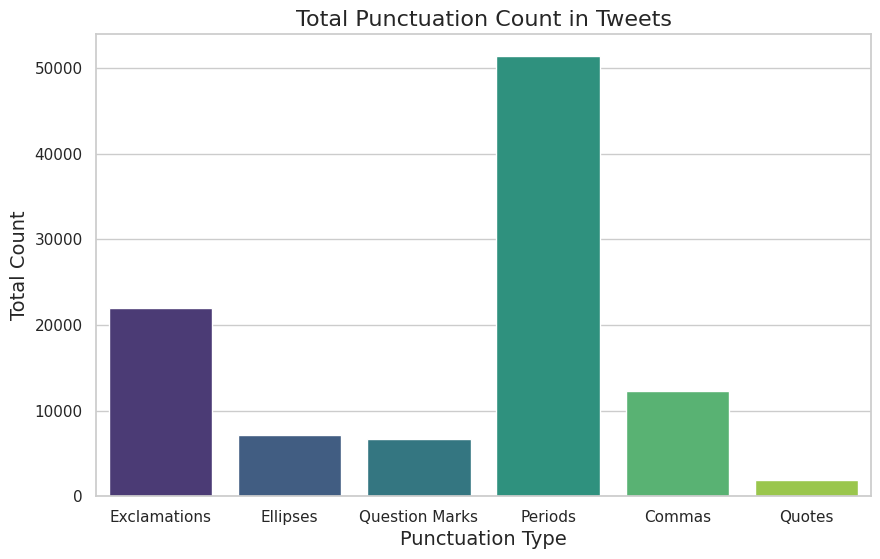

In [ ]:
sns.set(style="whitegrid")

# Create a DataFrame to hold the total count of each punctuation type across all tweets
punctuation_counts = {
    'Exclamations': emotion['exclamations'].sum(),
    'Ellipses': emotion['ellipses'].sum(),
    'Question Marks': emotion['question_marks'].sum(),
    'Periods': emotion['periods'].sum(),
    'Commas': emotion['commas'].sum(),
    'Quotes': emotion['quotes'].sum()
}

# Convert to DataFrame for easy plotting
punctuation_df = pd.DataFrame(list(punctuation_counts.items()), columns=['Punctuation', 'Count'])

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Punctuation', y='Count', data=punctuation_df, palette='viridis')

# Set the title and labels
plt.title('Total Punctuation Count in Tweets', fontsize=16)
plt.xlabel('Punctuation Type', fontsize=14)
plt.ylabel('Total Count', fontsize=14)

# Show the plot
plt.show()

In [ ]:
emotion.head(3)

tweet_id sentiment  \
0  1956967341     empty   
1  1956967666   sadness   
2  1956967696   sadness   

                                                                                        content  \
0  @tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[   
1                                  Layin n bed with a headache  ughhhh...waitin on your call...   
2                                                           Funeral ceremony...gloomy friday...   

                                                                                 clean_content  \
0  @tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[   
1                                  layin n bed with a headache ughhhh...waitin on your call...   
2                                                          funeral ceremony...gloomy friday...   

   slang_count  word_count  exclamations  ellipses  question_marks  periods  \
0            0          18             0         0               0        0   
1            0          10             0         2               0        6   
2            0           3             0         2               0        6   

   commas  quotes  
0       0       0  
1       0       0  
2       0       0

In [ ]:
print(emotion.columns)

Index(['tweet_id', 'sentiment', 'content', 'clean_content', 'slang_count',
       'word_count', 'exclamations', 'ellipses', 'question_marks', 'periods',
       'commas', 'quotes'],
      dtype='object')


In [ ]:
import scipy.stats as stats

# Create a list of exclamations grouped by sentiment
groups = [group["exclamations"].values for name, group in emotion.groupby("sentiment")]

# Run the ANOVA test
f_stat, p_val = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

F-statistic: 76.82990381104541
P-value: 1.8494753356558689e-187


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey HSD test on the 'exclamations' feature by 'sentiment' (emotion)
tukey = pairwise_tukeyhsd(endog=emotion['exclamations'],  # The feature to test
                          groups=emotion['sentiment'],    # The groups (emotions)
                          alpha=0.05)  # Significance level

# Print the results
print(tukey.summary())


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
     anger    boredom  -0.3761 0.4907 -0.9096  0.1574  False
     anger      empty  -0.4547 0.0417 -0.9016 -0.0078   True
     anger enthusiasm  -0.0375    1.0 -0.4868  0.4117  False
     anger        fun  -0.0064    1.0 -0.4391  0.4263  False
     anger  happiness    0.109 0.9998 -0.3152  0.5333  False
     anger       hate  -0.0977 0.9999 -0.5347  0.3392  False
     anger       love   0.0282    1.0 -0.3977   0.454  False
     anger    neutral  -0.4585 0.0196  -0.881  -0.036   True
     anger     relief  -0.2629 0.7309 -0.6976  0.1718  False
     anger    sadness  -0.3212 0.3688 -0.7455  0.1031  False
     anger   surprise  -0.1202 0.9994 -0.5505    0.31  False
     anger      worry  -0.3162 0.3886 -0.7387  0.1064  False
   boredom      empty  -0.0786    1.0 -0.4416  0.2844  False
   boredom enthusiasm   

/usr/local/lib/python3.11/dist-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [ ]:
# Perform Tukey HSD test on the 'exclamations' feature by 'sentiment' (emotion)
tukey = pairwise_tukeyhsd(endog=emotion['exclamations'],  # The feature to test
                          groups=emotion['quotes'],    # The groups (emotions)
                          alpha=0.05)  # Significance level

# Print the results
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.3013 0.9074 -0.4617 1.0644  False
     0      2  -0.0193 0.9997 -0.1636 0.1249  False
     0      3  -0.5505 0.9974 -3.3532 2.2522  False
     0      4   0.0874 0.9989 -0.4334 0.6082  False
     0      6  -0.4076 0.9848 -1.9058 1.0905  False
     0      8  -0.5505 0.9996  -4.514  3.413  False
     1      2  -0.3207 0.8873 -1.0967 0.4553  False
     1      3  -0.8519 0.9777 -3.7564 2.0527  False
     1      4  -0.2139 0.9935 -1.1373 0.7095  False
     1      6   -0.709 0.8771 -2.3901 0.9721  False
     1      8  -0.8519 0.9961 -4.8881 3.1844  False
     2      3  -0.5312 0.9979 -3.3374 2.2751  False
     2      4   0.1068 0.9973 -0.4329 0.6464  False
     2      6  -0.3883 0.9885 -1.8932 1.1165  False
     2      8  -0.5312 0.9997 -4.4972 3.4349  False
     3      4   0.6379 0.9947 -2.2126 3.4884  False
     3      

In [ ]:
# Perform Tukey HSD test on the 'exclamations' feature by 'sentiment' (emotion)
tukey = pairwise_tukeyhsd(endog=emotion['exclamations'],  # The feature to test
                          groups=emotion['commas'],    # The groups (emotions)
                          alpha=0.05)  # Significance level

# Print the results
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0568 0.0419 -0.1126 -0.001   True
     0      2  -0.0743 0.4586 -0.1813 0.0327  False
     0      3    0.001    1.0 -0.2168 0.2188  False
     0      4   0.0538    1.0 -0.3679 0.4756  False
     0      5  -0.4527 0.9186 -1.4553 0.5499  False
     0      6  -0.2305    1.0 -1.9667 1.5057  False
     0      7  -0.2781 0.9999 -1.8855 1.3294  False
     0      8  -0.5638 0.9999 -3.5708 2.4432  False
     0      9  -0.5638    1.0 -4.8163 3.6887  False
     1      2  -0.0175    1.0 -0.1332 0.0982  False
     1      3   0.0578 0.9983 -0.1644   0.28  False
     1      4   0.1107 0.9982 -0.3134 0.5347  False
     1      5  -0.3959 0.9645 -1.3994 0.6077  False
     1      6  -0.1736    1.0 -1.9104 1.5631  False
     1      7  -0.2213    1.0 -1.8293 1.3868  False
     1      8   -0.507    1.0 -3.5143 2.5004  False
     1      

In [ ]:
# Perform Tukey HSD test on the 'exclamations' feature by 'sentiment' (emotion)
tukey = pairwise_tukeyhsd(endog=emotion['exclamations'],  # The feature to test
                          groups=emotion['periods'],    # The groups (emotions)
                          alpha=0.05)  # Significance level

# Print the results
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.2301    0.0 -0.2953 -0.1649   True
     0      2  -0.2957    0.0 -0.3778 -0.2135   True
     0      3  -0.1424    0.0 -0.2304 -0.0545   True
     0      4  -0.2065    0.0 -0.3274 -0.0857   True
     0      5  -0.1237 0.7164 -0.3051  0.0576  False
     0      6  -0.1479 0.4799  -0.342  0.0462  False
     0      7  -0.2293 0.2917 -0.5054  0.0467  False
     0      8  -0.0528    1.0 -0.4224  0.3169  False
     0      9  -0.0211    1.0 -0.4309  0.3888  False
     0     10   0.0359    1.0 -0.6265  0.6984  False
     0     11   -0.105    1.0 -0.8437  0.6338  False
     0     12  -0.4105 0.9885 -1.2363  0.4153  False
     0     13   0.2869    1.0 -0.8494  1.4231  False
     0     14   0.5213    1.0 -0.9717  2.0143  False
     0     15  -0.1605    1.0 -1.7263  1.4053  False
     0     16  -0.0605    1.0 -2.2746  2.1536 

In [ ]:
# Perform Tukey HSD test on the 'exclamations' feature by 'sentiment' (emotion)
tukey = pairwise_tukeyhsd(endog=emotion['exclamations'],  # The feature to test
                          groups=emotion['question_marks'],    # The groups (emotions)
                          alpha=0.05)  # Significance level

# Print the results
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0488  0.991 -0.1418 0.0443  False
     0      2   0.1836 0.2012 -0.0247  0.392  False
     0      3   0.3726 0.0843 -0.0159  0.761  False
     0      4    0.689 0.0353  0.0172 1.3607   True
     0      5   0.8727 0.6113 -0.3104 2.0558  False
     0      6   1.1183 0.8557 -0.6004 2.8371  False
     0      7   1.5426 0.0554 -0.0121 3.0973  False
     0      8  -0.0483    1.0 -2.6262 2.5296  False
     0      9  -0.5483    1.0 -3.1262 2.0296  False
     0     10  -0.5483    1.0 -5.7039 4.6073  False
     0     11  -0.5483    1.0  -3.525 2.4283  False
     0     12  -0.5483    1.0 -5.7039 4.6073  False
     0     13  -0.5483    1.0 -4.1939 3.0973  False
     0     14  -0.0483    1.0 -3.6939 3.5973  False
     0     15  -0.5483    1.0 -4.1939 3.0973  False
     0     16  -0.5483    1.0 -4.1939 3.0973  False
     0     1

In [ ]:
# Perform Tukey HSD test on the 'exclamations' feature by 'sentiment' (emotion)
tukey = pairwise_tukeyhsd(endog=emotion['ellipses'],  # The feature to test
                          groups=emotion['sentiment'],    # The groups (emotions)
                          alpha=0.05)  # Significance level

# Print the results
print(tukey.summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
     anger    boredom    0.078 0.9883 -0.1247  0.2807  False
     anger      empty   0.0311    1.0 -0.1387  0.2009  False
     anger enthusiasm   0.0126    1.0  -0.158  0.1833  False
     anger        fun   0.0313    1.0  -0.133  0.1957  False
     anger  happiness   0.0114    1.0 -0.1498  0.1726  False
     anger       hate    0.079 0.9371  -0.087  0.2451  False
     anger       love   0.0068    1.0  -0.155  0.1686  False
     anger    neutral   0.0001    1.0 -0.1605  0.1606  False
     anger     relief   0.0466 0.9994 -0.1186  0.2117  False
     anger    sadness   0.0739 0.9522 -0.0873  0.2351  False
     anger   surprise   0.0352    1.0 -0.1283  0.1986  False
     anger      worry   0.0628 0.9865 -0.0977  0.2234  False
   boredom      empty  -0.0469 0.9961 -0.1848   0.091  False
   boredom enthusiasm  -

In [ ]:
X = emotion[['clean_content', 'exclamations', 'ellipses', 'question_marks', 'word_count', 'slang_count']]
y = emotion['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train['clean_content'])
X_test_tfidf = vectorizer.transform(X_test['clean_content'])

X_train_combined = pd.concat([pd.DataFrame(X_train[['exclamations', 'ellipses', 'question_marks', 'word_count', 'slang_count']].values), pd.DataFrame(X_train_tfidf.toarray())], axis=1)
X_test_combined = pd.concat([pd.DataFrame(X_test[['exclamations', 'ellipses', 'question_marks', 'word_count', 'slang_count']].values), pd.DataFrame(X_test_tfidf.toarray())], axis=1)


In [ ]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_combined, y_train)

# Make predictions
y_pred = model.predict(X_test_combined)

# Output accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.335375

Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.08      0.01      0.01       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.10      0.01      0.02       338
   happiness       0.33      0.36      0.34      1028
        hate       0.43      0.16      0.23       268
        love       0.46      0.35      0.40       762
     neutral       0.35      0.54      0.43      1740
      relief       0.09      0.00      0.01       352
     sadness       0.37      0.16      0.23      1046
    surprise       0.24      0.01      0.03       425
       worry       0.30      0.53      0.38      1666

    accuracy                           0.34      8000
   macro avg       0.21      0.16      0.16      8000
weighted avg       0.31      0.34      0.29      8000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


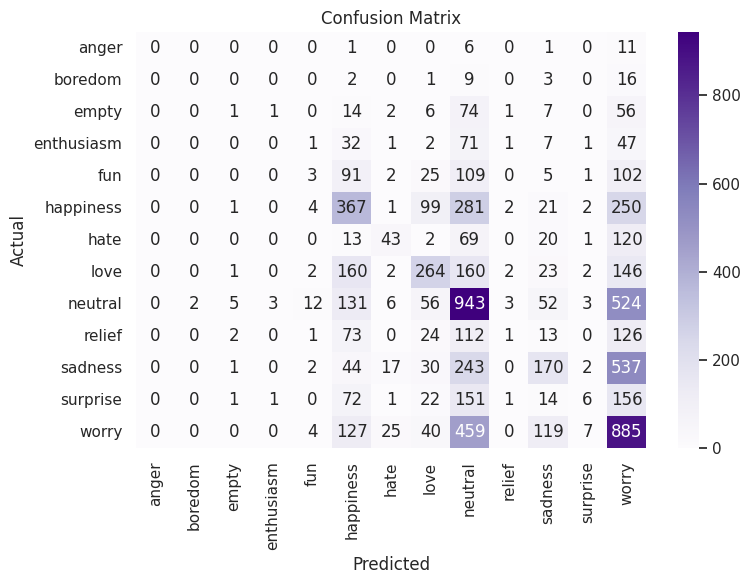

In [39]:
from sklearn.metrics import confusion_matrix
labels = sorted(y_test.unique())

cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Purples',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [40]:
emotion.head(5)

tweet_id   sentiment  \
0  1956967341       empty   
1  1956967666     sadness   
2  1956967696     sadness   
3  1956967789  enthusiasm   
4  1956968416     neutral   

                                                                                        content  \
0  @tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[   
1                                  Layin n bed with a headache  ughhhh...waitin on your call...   
2                                                           Funeral ceremony...gloomy friday...   
3                                                          wants to hang out with friends SOON!   
4        @dannycastillo We want to trade with someone who has Houston tickets, but no one will.   

                                                                                 clean_content  \
0  @tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[   
1                                  layin n bed with a headache ughhhh...waitin on your call...   
2                                                          funeral ceremony...gloomy friday...   
3                                                         wants to hang out with friends soon!   
4       @dannycastillo we want to trade with someone who has houston tickets, but no one will.   

   slang_count  word_count  exclamations  ellipses  question_marks  periods  \
0            0          18             0         0               0        0   
1            0          10             0         2               0        6   
2            0           3             0         2               0        6   
3            0           7             1         0               0        0   
4            0          15             0         0               0        1   

   commas  quotes  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       1       0

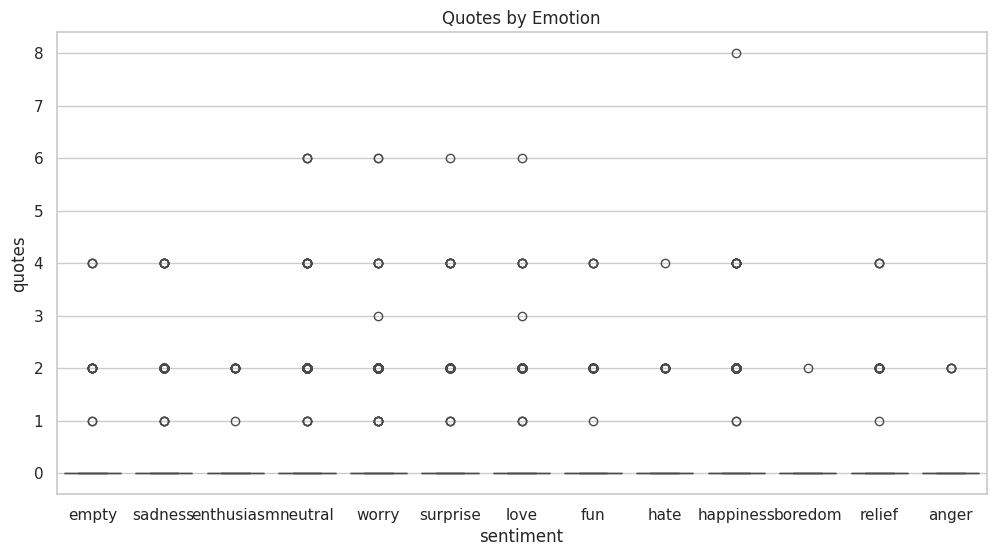

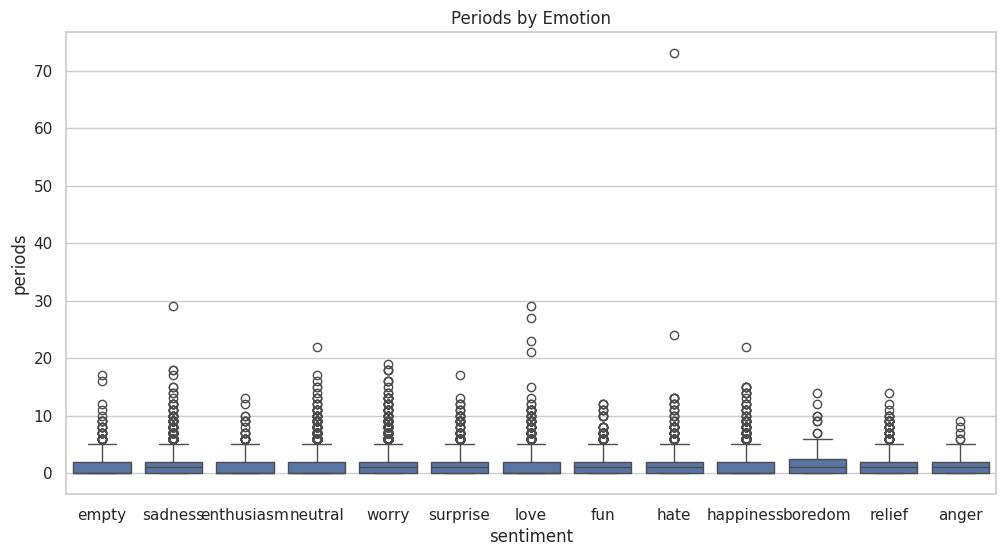

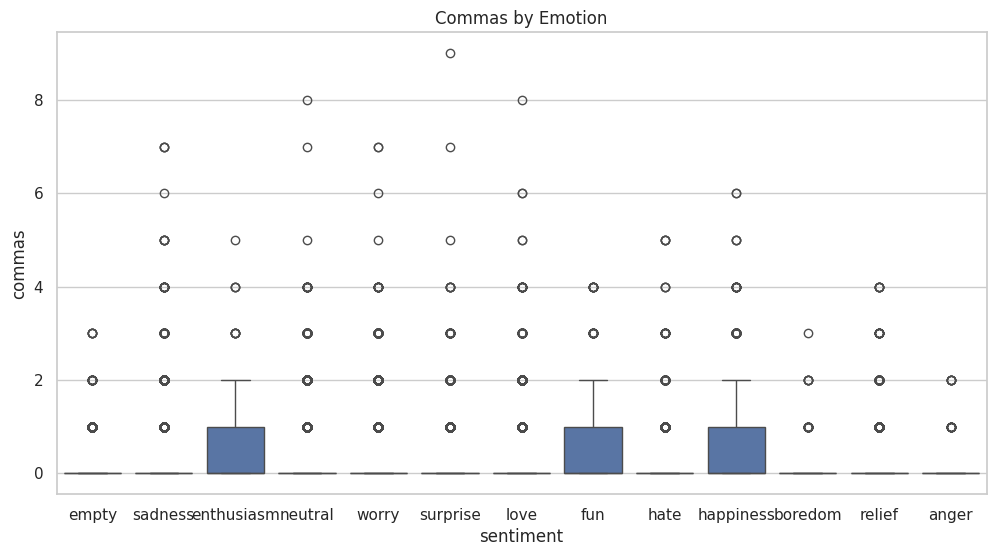

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='quotes', data=emotion)
plt.title("Quotes by Emotion")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='periods', data=emotion)
plt.title("Periods by Emotion")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='commas', data=emotion)
plt.title("Commas by Emotion")
plt.show()

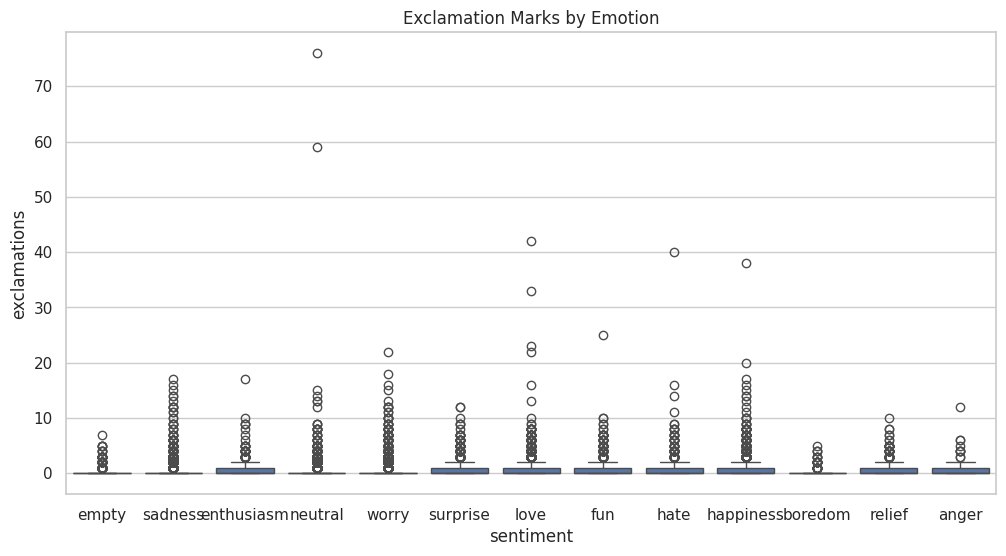

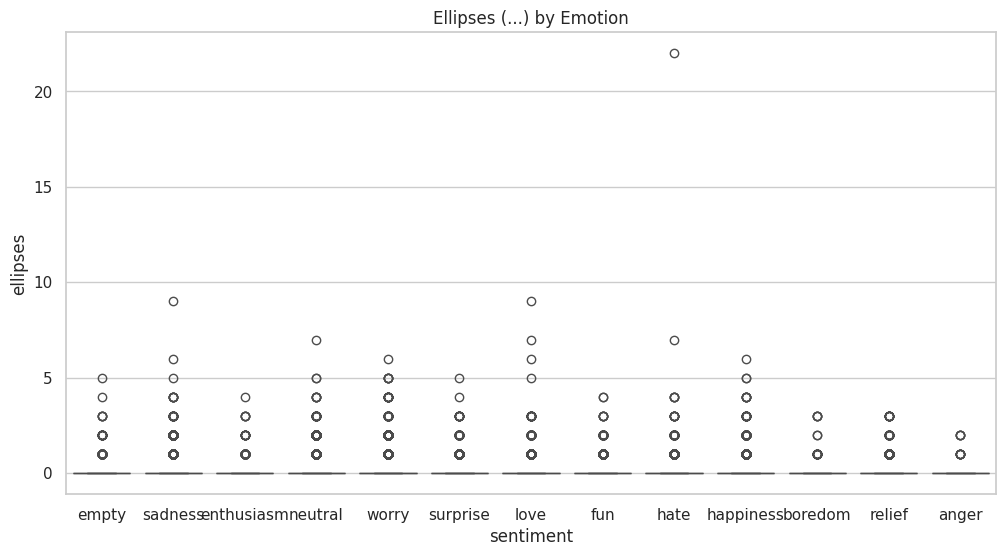

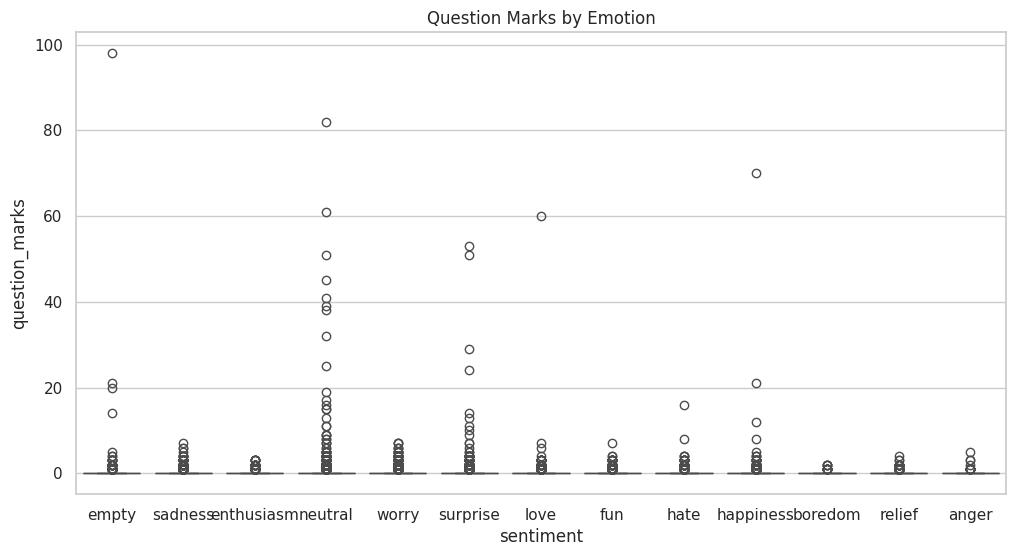

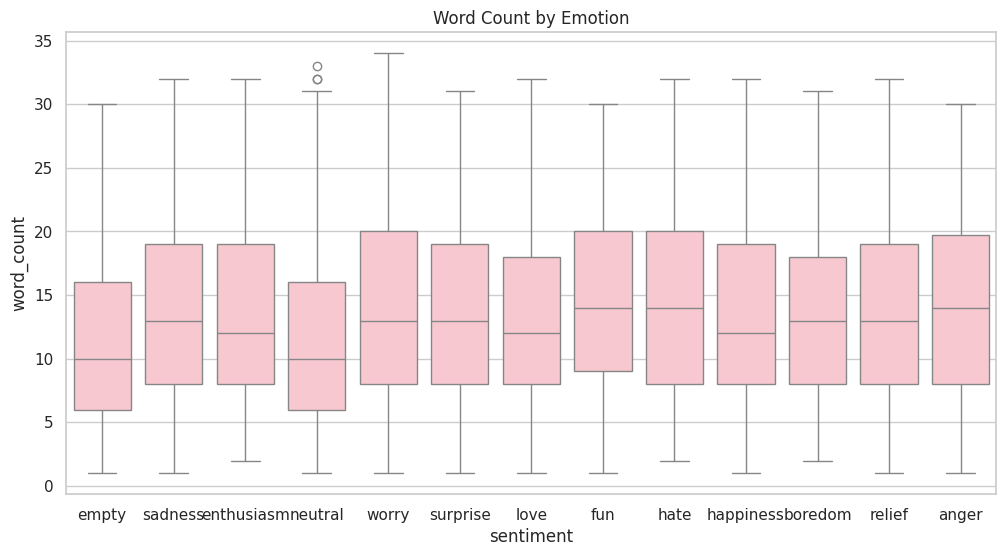

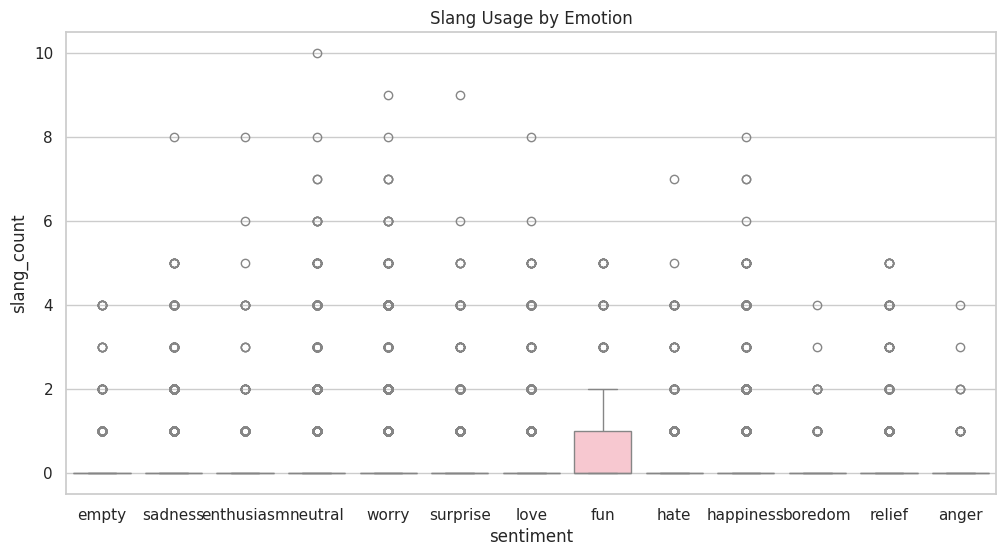

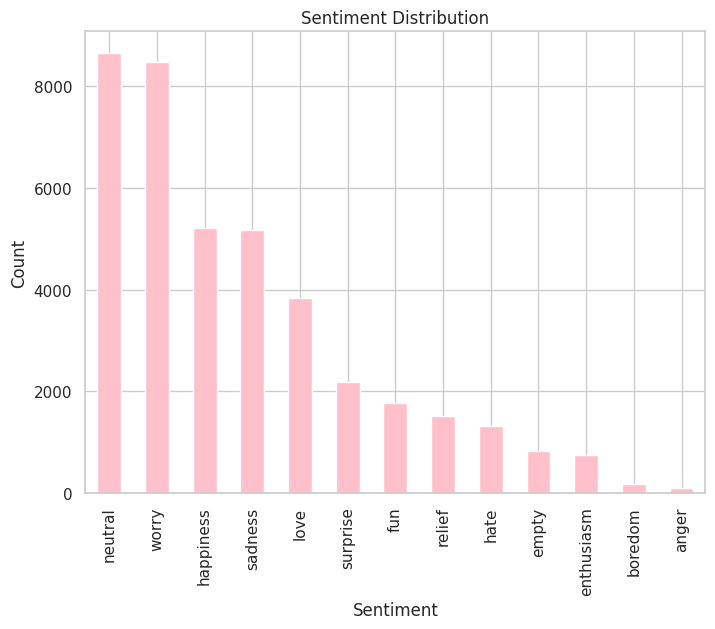

In [ ]:
# Visualize the usage of punctuation marks by emotion
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='exclamations', data=emotion)
plt.title("Exclamation Marks by Emotion")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='ellipses', data=emotion)
plt.title("Ellipses (...) by Emotion")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='question_marks', data=emotion)
plt.title("Question Marks by Emotion")
plt.show()

# Word Count vs Emotion
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='word_count', data=emotion, color = "pink")
plt.title("Word Count by Emotion")
plt.show()

# Slang Usage by Emotion
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='slang_count', data=emotion, color = "pink")
plt.title("Slang Usage by Emotion")
plt.show()

# Sentiment Distribution
plt.figure(figsize=(8, 6))
emotion['sentiment'].value_counts().plot(kind='bar', color ='pink')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [101]:
results = X_test.copy()
results['true_label'] = y_test.values
results['predicted_label'] = y_pred
results['clean_content'] = X_test['clean_content']

misclassified = results[results['true_label'] != results['predicted_label']]

sample = misclassified.sample(1)
print("Tweet Text:", sample['clean_content'].values[0])
print("True Emotion:", sample['true_label'].values[0])
print("Predicted Emotion:", sample['predicted_label'].values[0])

Tweet Text: trying to upload one thousand photos!!
True Emotion: enthusiasm
Predicted Emotion: neutral


In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 # Apply Shapiro-Wilk test for normality on 'word_count' (or other columns)
data = emotion['word_count']

# Shapiro-Wilk test
stat, p_value = shapiro(data)

print(f"Shapiro-Wilk test statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret result
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data is normally distributed.")

Shapiro-Wilk test statistic: 0.9619717929193683
P-value: 6.495622689592695e-70
The data is not normally distributed.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40000.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Function to check if data is normalized (Min-Max or Z-Score)
def check_normalization(data, method='min-max'):
    data = np.array(data)
    if method == 'min-max':
        min_val = data.min()
        max_val = data.max()
        if min_val >= 0 and max_val <= 1:
            return "Data is normalized using Min-Max Scaling (between 0 and 1)."
        else:
            return "Data is not normalized using Min-Max Scaling."

    elif method == 'z-score':
        mean = data.mean()
        std_dev = data.std()
        if np.isclose(mean, 0, atol=1e-2) and np.isclose(std_dev, 1, atol=1e-2):
            return "Data is normalized using Z-Score Scaling (mean=0, std=1)."
        else:
            return "Data is not normalized using Z-Score Scaling."
    else:
        return "Invalid normalization method. Choose 'min-max' or 'z-score'."

# Example usage of normalization check
data_min_max = np.random.uniform(0, 1, 100)
data_z_score = np.random.normal(0, 1, 100)

print(check_normalization(data_min_max, method='min-max'))
print(check_normalization(data_z_score, method='z-score'))

Data is normalized using Min-Max Scaling (between 0 and 1).
Data is not normalized using Z-Score Scaling.
